In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('ggplot')
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('CustomerChurn.csv')

In [4]:
backup = df.copy()

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Data cleaning and Processing

##### There are 11 whitspace strings in total charges column because of that we will face some issue during conversion from string to numeric
##### so let's first replace whitespace with NaN

In [5]:
df['TotalCharges']=df['TotalCharges'].replace(r'^\s*$',np.nan,regex=True)

In [6]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

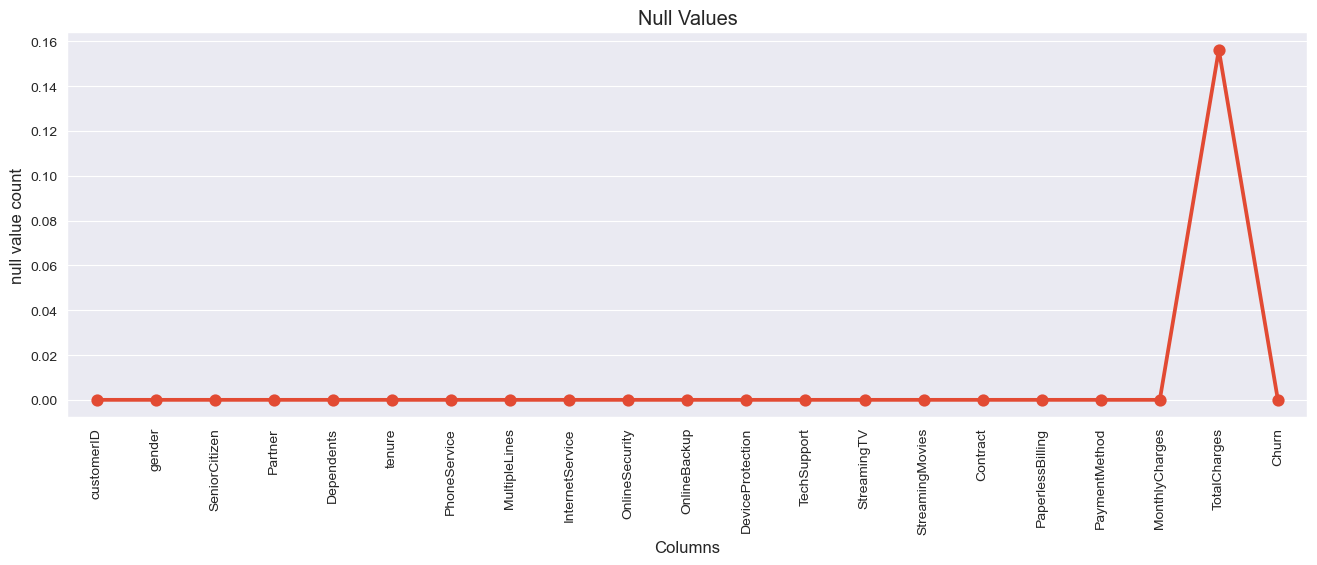

In [9]:
missingdata = pd.DataFrame(((df.isnull().sum())/df.shape[0])*100).reset_index()
plt.figure(figsize=(16,5))
sns.pointplot(data=missingdata,x='index',y=0)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('null value count')
plt.title('Null Values')
plt.show()

In [10]:
df.dropna(inplace=True)  # drop the missing data rows

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

## Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Churn distribution')

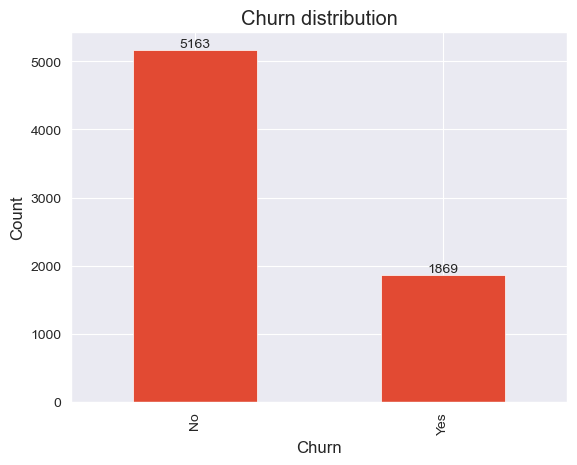

In [42]:
Churn=df['Churn'].value_counts().plot(kind='bar')
for bars in Churn.containers:
    Churn.bar_label(bars)
plt.ylabel('Count')
plt.title('Churn distribution')

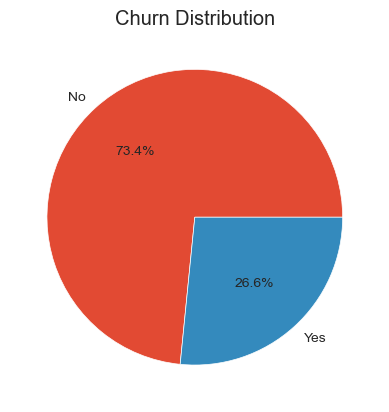

In [32]:
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%0.1f%%')
plt.title('Churn Distribution')
plt.show()

##### -Data is highly imbalanced, ratio = 73:27 
##### -So we analyse the data with other features while taking the target values separately to get some insights..

### Feature Engineering

##### Create bins for tenure column to get more clear insights

In [34]:
print(df['tenure'].max()) # find the max value of tenure column to create the labels upto the max value

72


In [12]:
labels=[]
for i in range(1,72,12):
    labels.append('{}-{}'.format(i,i+11))
labels

['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']

In [13]:
bins = list(range(1,74,12))
bins

[1, 13, 25, 37, 49, 61, 73]

In [14]:
df['tenure_grp'] = pd.cut(df.tenure,labels=labels,bins=bins,right=False) # right false means it'll not include the right endpoint in each interval
df.tenure_grp.value_counts()

tenure_grp
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

#### Data Reduction

In [13]:
df.drop(columns=['customerID','tenure'],inplace=True)  # reduce unnecessary features

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


### Univariate Analysis

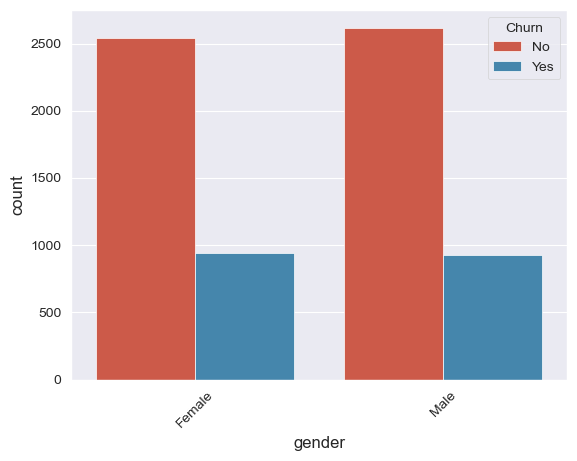

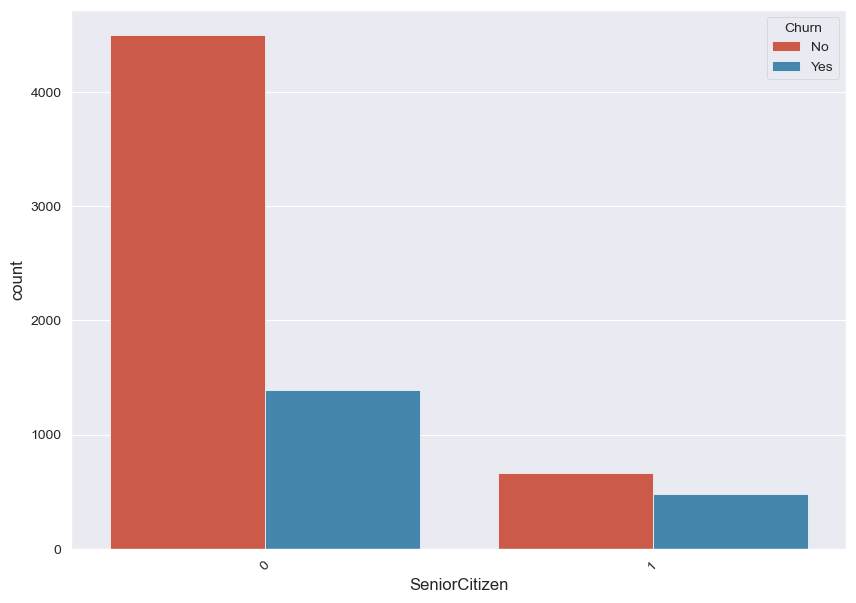

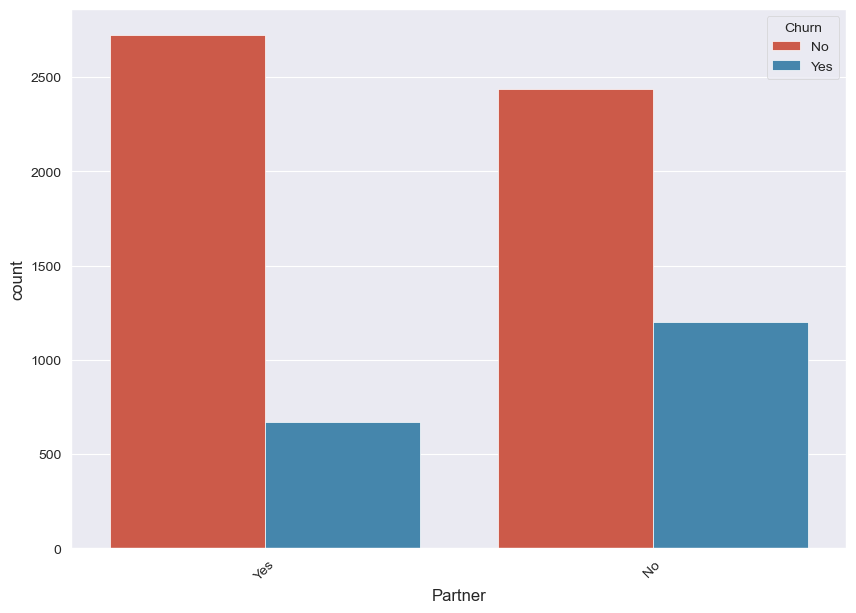

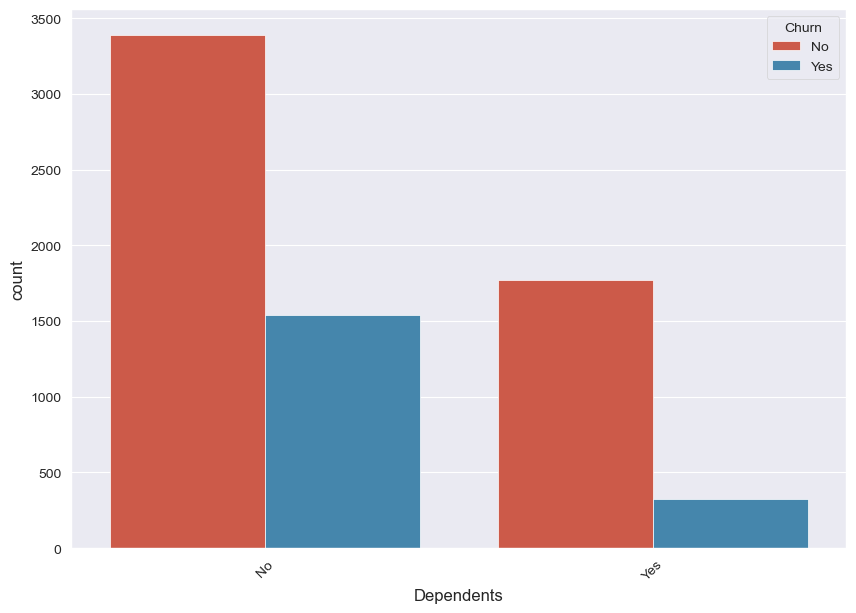

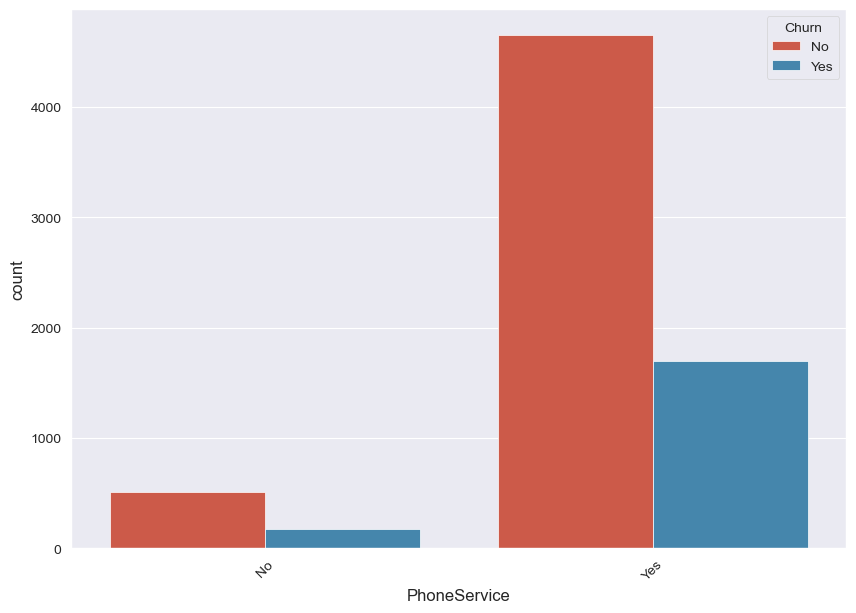

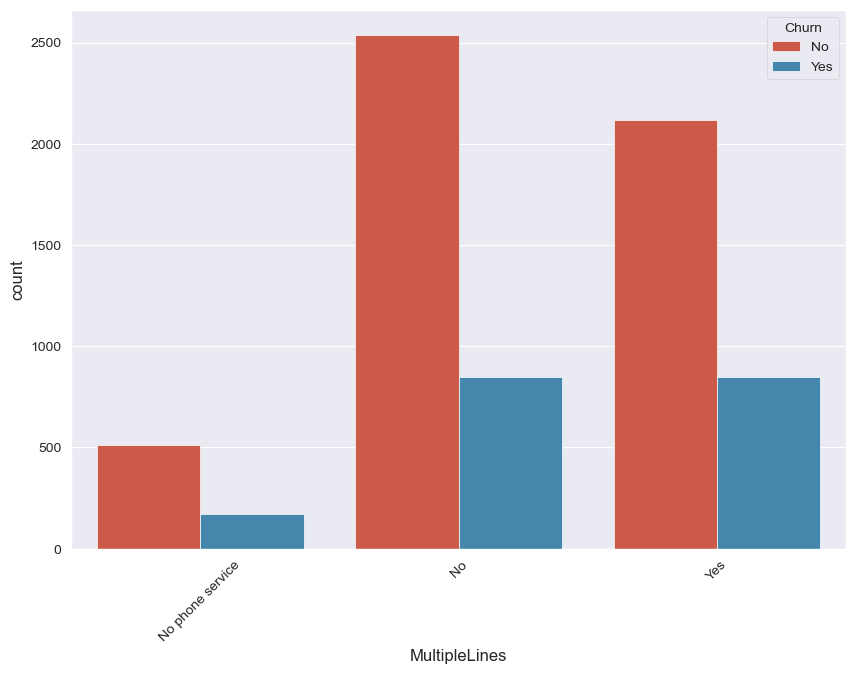

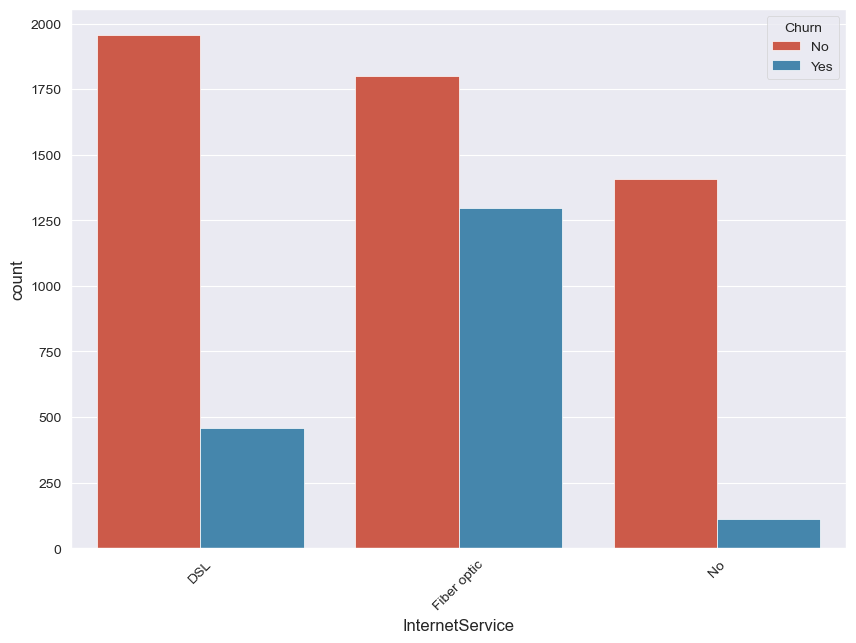

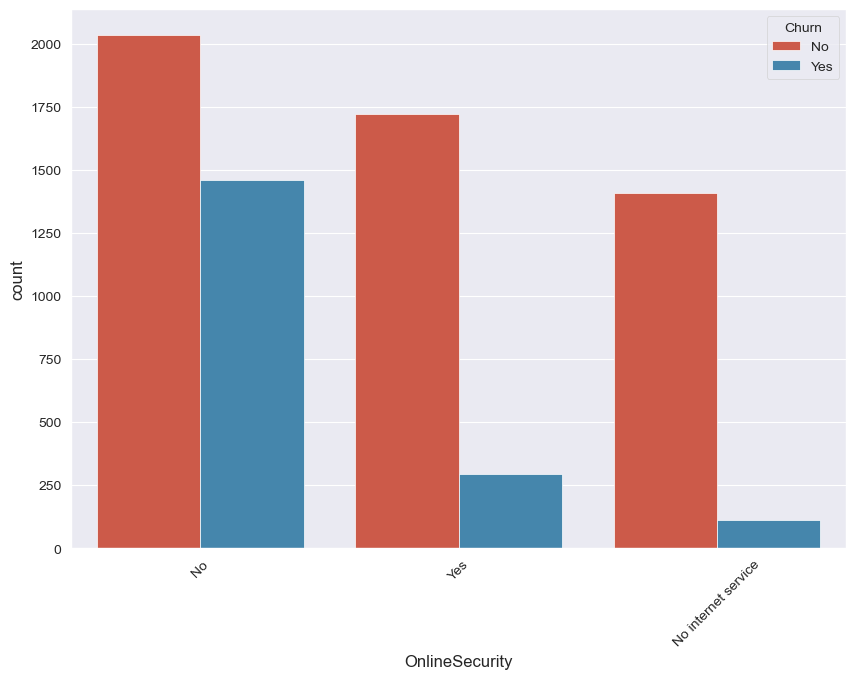

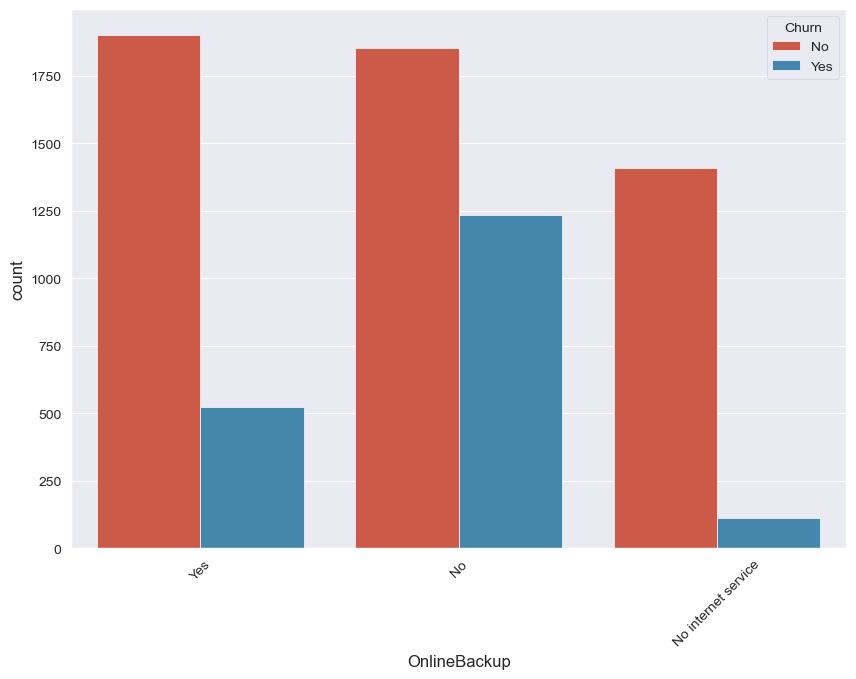

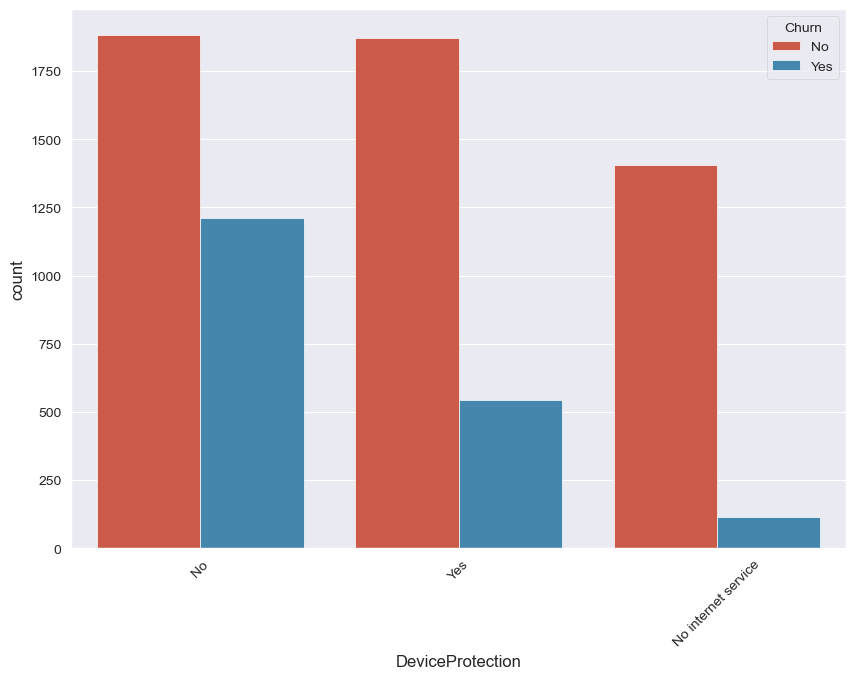

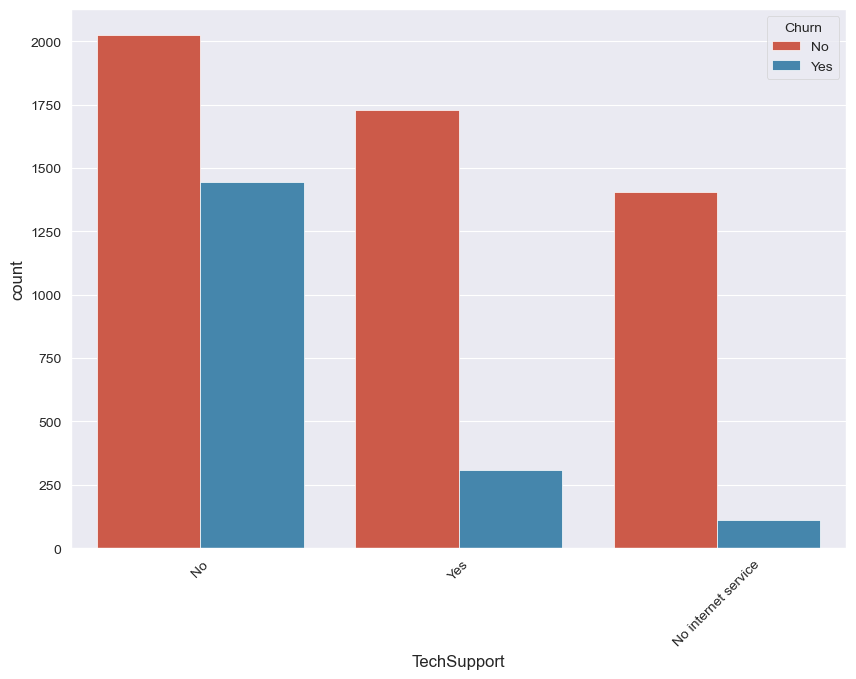

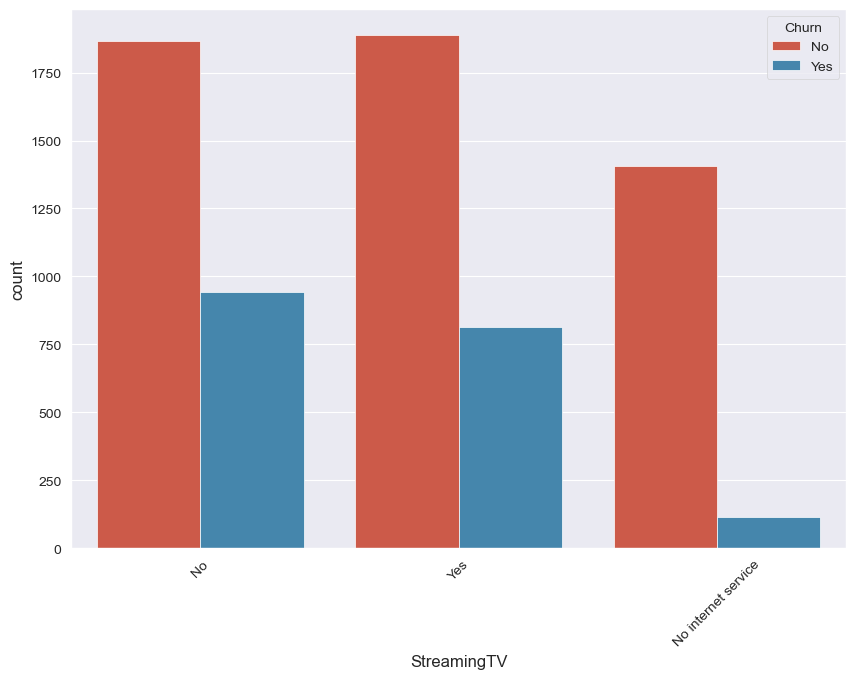

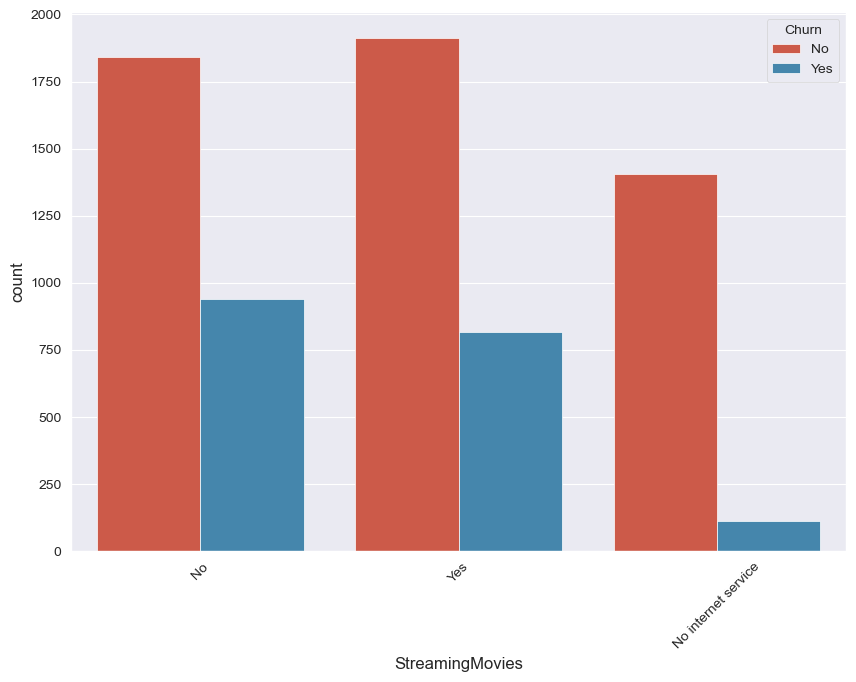

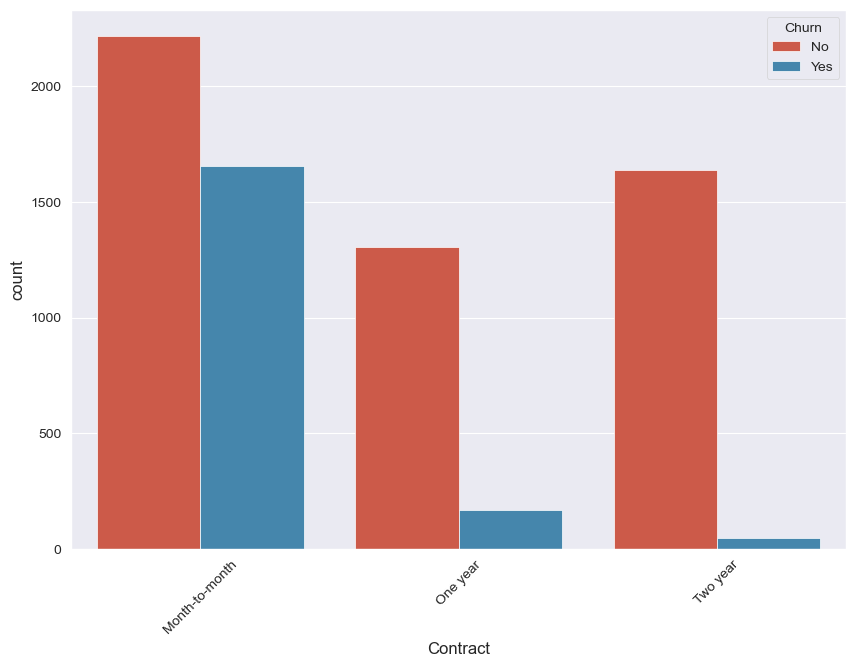

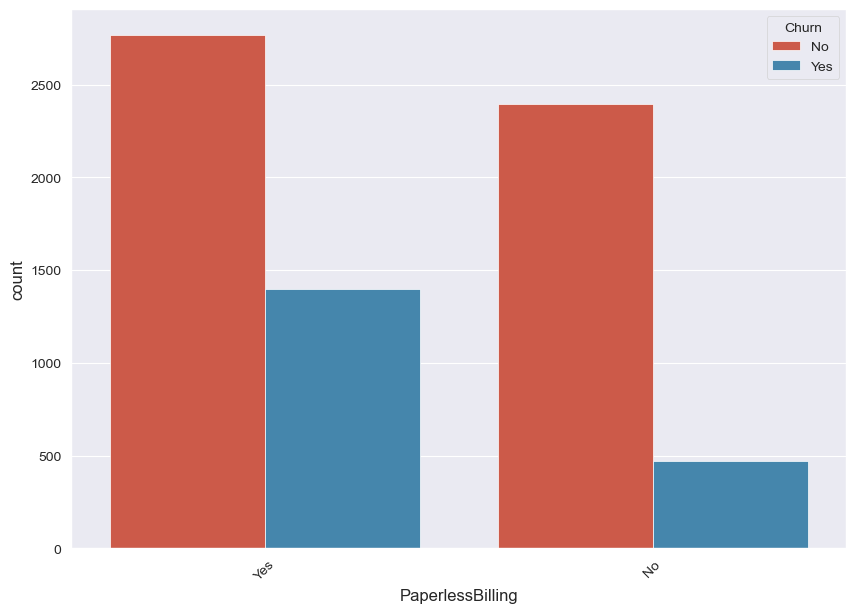

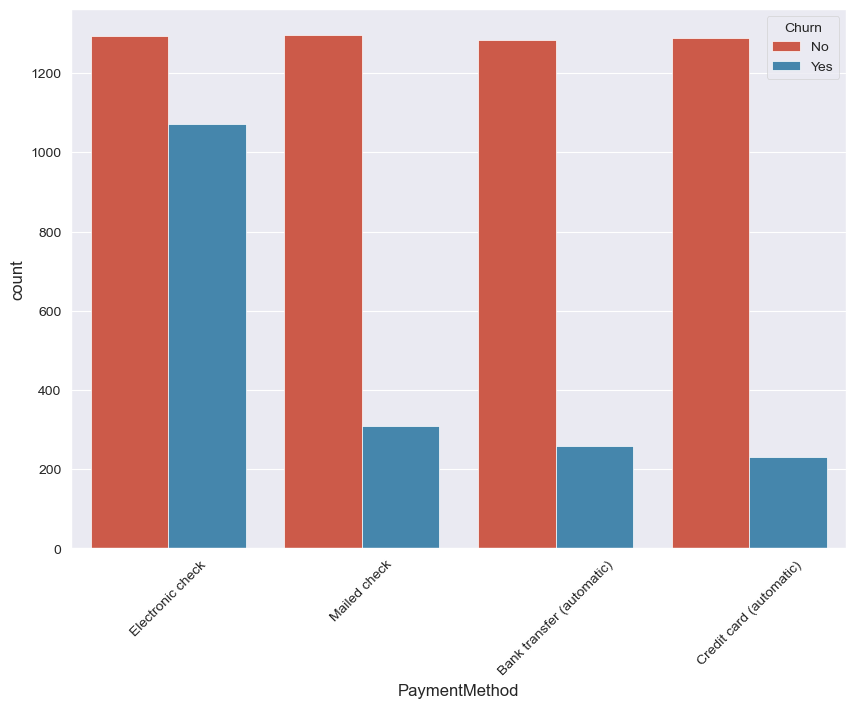

<Figure size 1000x700 with 0 Axes>

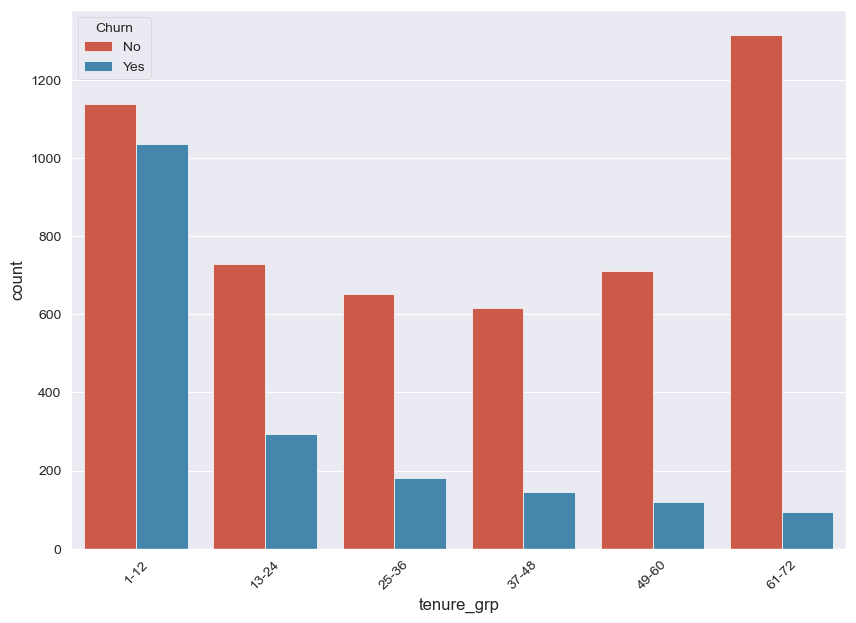

In [50]:

for i,predictor in enumerate(df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(figsize = (10,7))
    plt.figure(i)
    sns.countplot(data=df,x=predictor,hue='Churn')
    plt.xticks(rotation=45)

##### Conclusion -¶
##### -senior citizen are more likely to churn
##### -People with no partners are more likely to churn
##### -Monthly contracts are more likeyly to churn becuase they are free customers
##### -People who pay via electornic check are more likely to churn

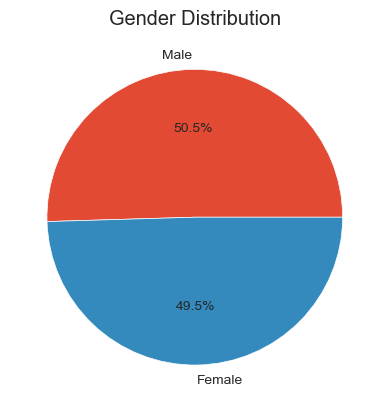

In [15]:
gender = df.gender.value_counts()
plt.pie(gender,labels=gender.index,autopct='%0.1f%%')
plt.title('Gender Distribution')
plt.show()

In [17]:
notchurndf=df[df['Churn']=='No']
churndf=df[df['Churn']=='Yes']

In [59]:
churndf.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12
5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1-12
8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,25-36
13,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,49-60


In [18]:
var=churndf.gender.value_counts()
var

gender
Female    939
Male      930
Name: count, dtype: int64

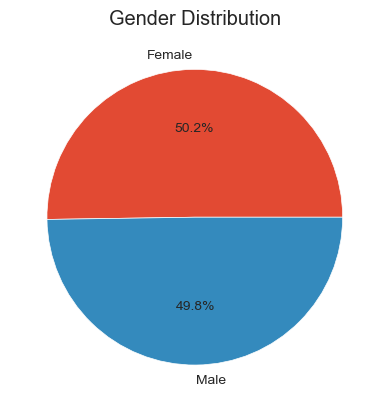

In [19]:
gender = churndf.gender.value_counts()
plt.pie(gender,labels=gender.index,autopct='%0.1f%%')
plt.title('Gender Distribution')
plt.show()

### Bivariate Analysis

In [66]:
pd.crosstab(df.PaymentMethod, df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


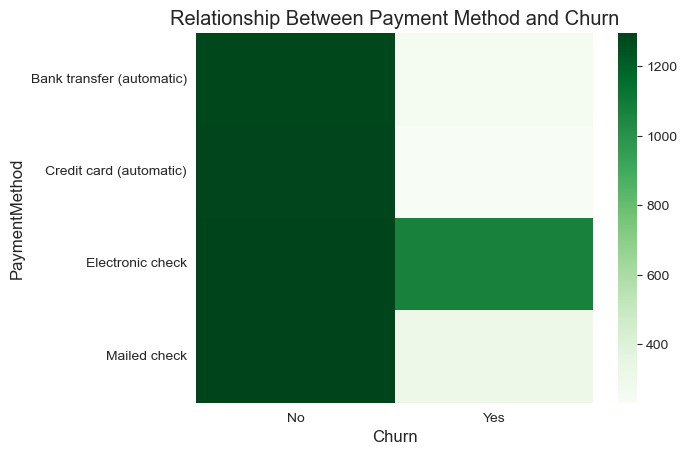

In [74]:
sns.heatmap(pd.crosstab(df.PaymentMethod,df.Churn), cmap='Greens')
plt.title('Relationship Between Payment Method and Churn')
plt.show()

##### Converting Churn Column to Numerical Format

In [16]:
df['Churn']=np.where(df['Churn']=='Yes',1,0)   
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


### Feature Encoding: Dummy Variables

In [17]:
dummy = pd.get_dummies(df)
dummy.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_1-12,tenure_grp_13-24,tenure_grp_25-36,tenure_grp_37-48,tenure_grp_49-60,tenure_grp_61-72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


##### Correlation between Monthly Charges and Total Charges

In [19]:
dummy.to_csv('tel.csv')   # export

In [79]:
df.MonthlyCharges.corr(df.TotalCharges) 

0.6510648032262024

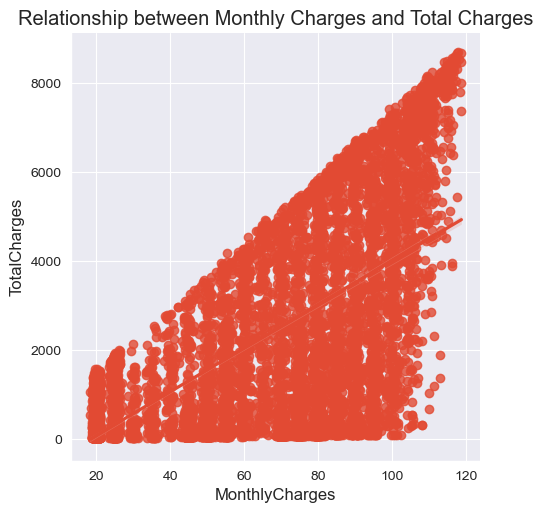

In [80]:
sns.lmplot(data=dummy,x='MonthlyCharges',y='TotalCharges')
plt.title('Relationship between Monthly Charges and Total Charges')
plt.show()

##### Total Charges increase as Monthly Charges increase - as expected.

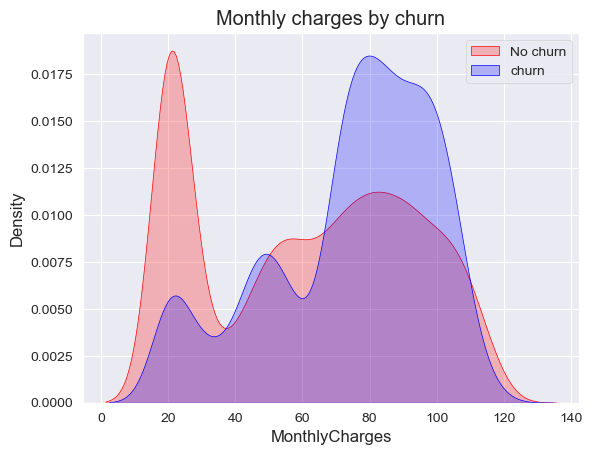

In [81]:
kd = sns.kdeplot(dummy.MonthlyCharges[(dummy['Churn'] == 0)],color='red',fill='True')
ad = sns.kdeplot(dummy.MonthlyCharges[(dummy['Churn'] == 1)],color='blue',fill='True')
plt.legend(['No churn','churn'],loc='upper right')
plt.title('Monthly charges by churn')
plt.show()

##### Churn is high when monthly charges are high

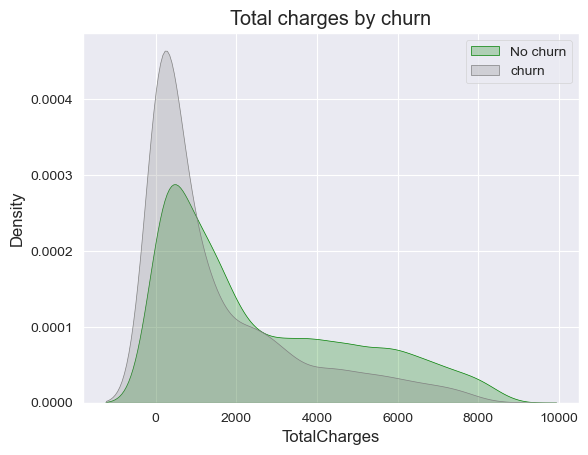

In [83]:
kd = sns.kdeplot(dummy.TotalCharges[(dummy['Churn'] == 0)],color='green',fill='True')
ad = sns.kdeplot(dummy.TotalCharges[(dummy['Churn'] == 1)],color='grey',fill='True')
plt.legend(['No churn','churn'],loc='upper right')
plt.title('Total charges by churn')
plt.show()

##### Higher churn when lower total charges
##### Higher monthly charges, lower Tenure and low total charges linked to high churn

In [86]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


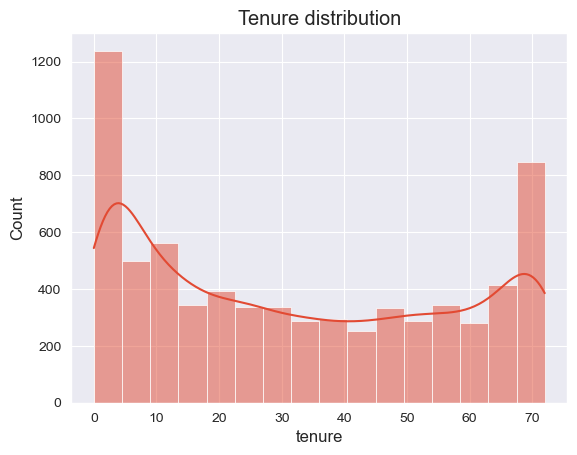

In [93]:
sns.histplot(backup.tenure,kde=True)
plt.title('Tenure distribution')
plt.show()

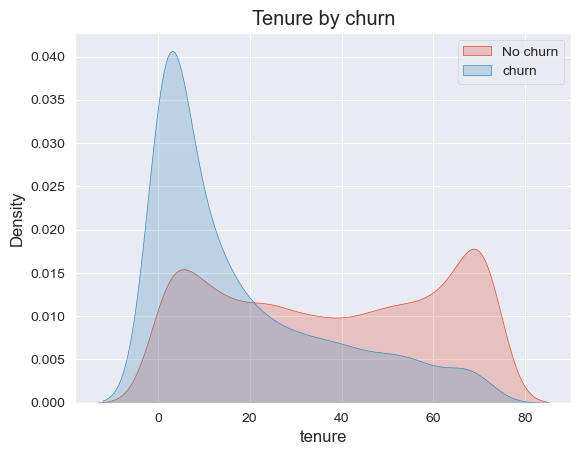

In [92]:
kd = sns.kdeplot(backup.tenure[(backup['Churn'] == 'No')],fill='True')
ad = sns.kdeplot(backup.tenure[(backup['Churn'] == 'Yes')],fill='True')
plt.legend(['No churn','churn'],loc='upper right')
plt.title('Tenure by churn')
plt.show()

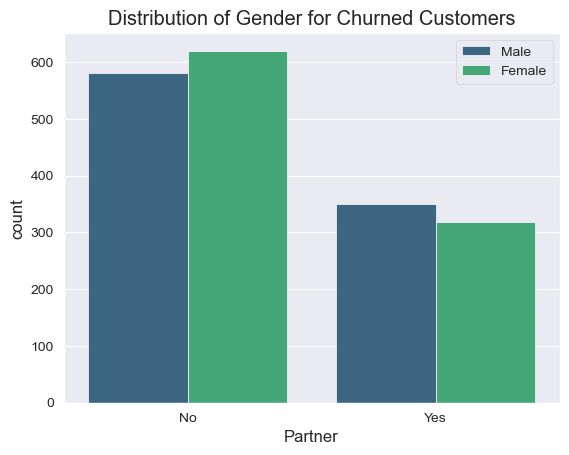

In [98]:
sns.countplot(x='Partner',hue='gender',data=churndf,palette='viridis')
plt.title("Distribution of Gender for Churned Customers")
plt.legend(title=None)
plt.show()

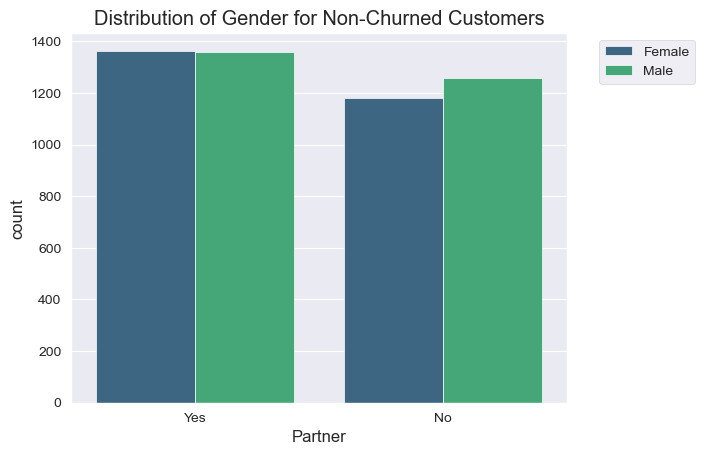

In [103]:
sns.countplot(x='Partner',hue='gender',data=notchurndf,palette='viridis')
plt.title("Distribution of Gender for Non-Churned Customers")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

##### Female with no partner are more likely to churn

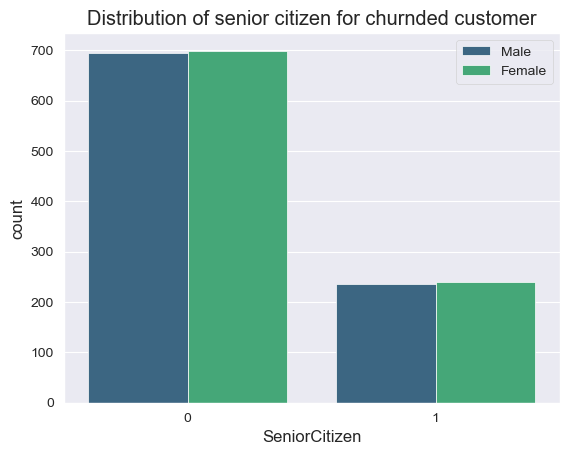

In [120]:
sns.countplot(x='SeniorCitizen',hue='gender',data=churndf,palette='viridis')
plt.title('Distribution of senior citizen for churnded customer')
plt.legend(title=None)
plt.show()

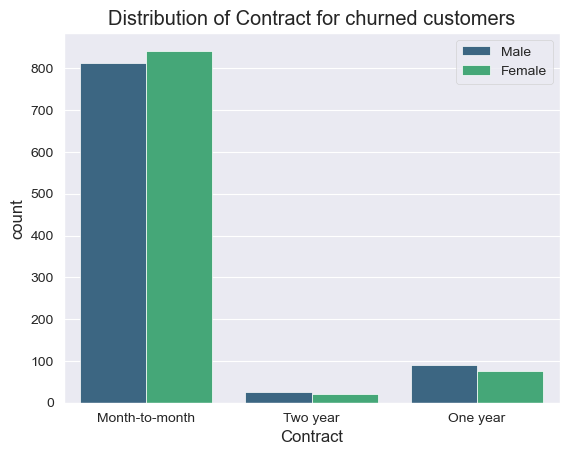

In [119]:
sns.countplot(x='Contract',hue='gender',data=churndf,palette='viridis')
plt.title('Distribution of Contract for churned customers')
plt.legend(title=None)
plt.show()

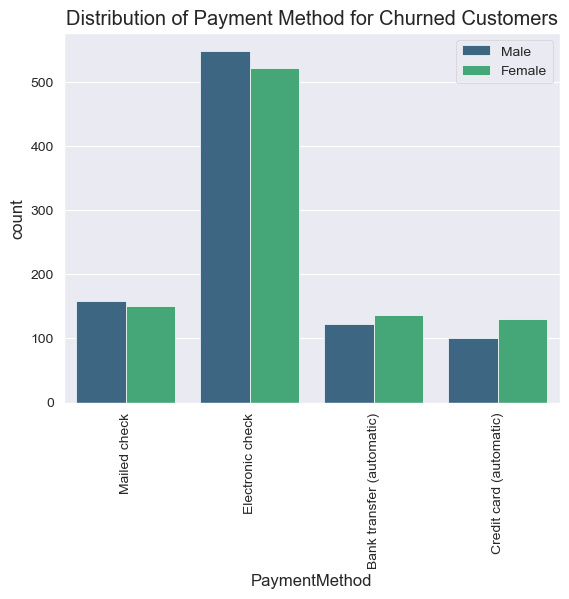

In [99]:
sns.countplot(x='PaymentMethod',hue='gender',data=churndf,palette='viridis')
plt.xticks(rotation=90)
plt.title("Distribution of Payment Method for Churned Customers")
plt.legend(title=None)
plt.show()

##### In addtion of electrnoic check, Female who are paying via credit card are more likeyly to churn

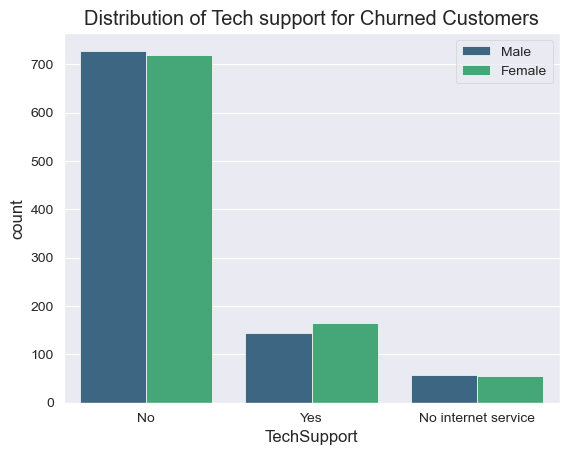

In [102]:
sns.countplot(x='TechSupport',hue='gender',data=churndf,palette='viridis')
plt.title("Distribution of Tech support for Churned Customers")
plt.legend(title=None)
plt.show()

##### No Online security, No Tech Support category are high churners

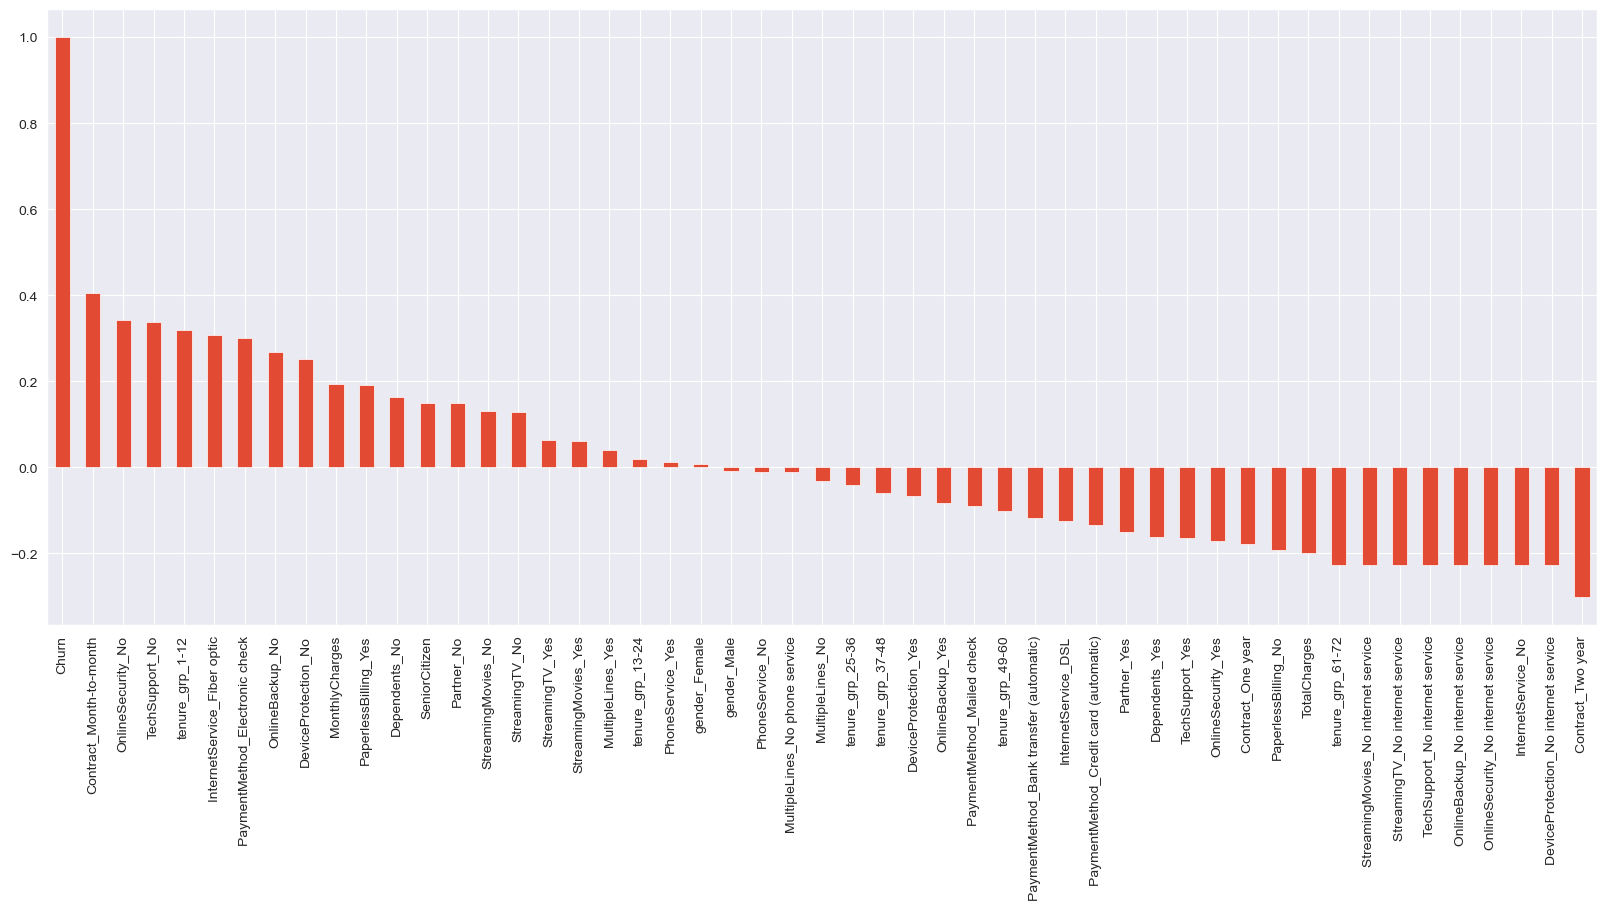

In [104]:
plt.figure(figsize=(20,8))
dummy.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

##### HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

##### LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

##### Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

### Multivariate analysis

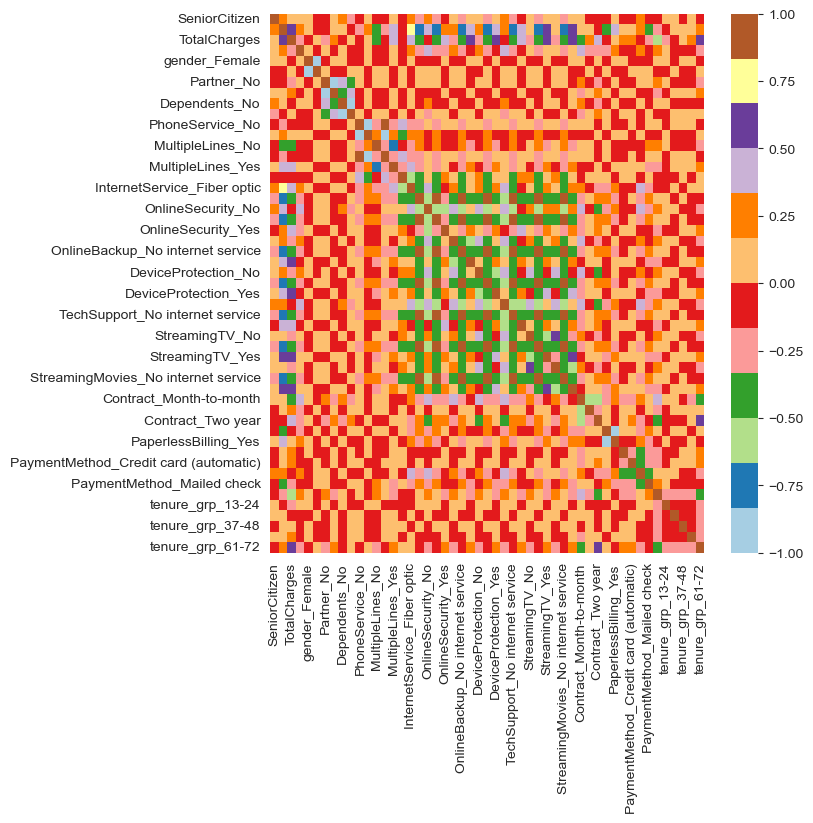

In [114]:
plt.figure(figsize=(7,7))
sns.heatmap(dummy.corr(),cmap='Paired')
plt.show()

## Final Conclusion

#### 1. **Short Tenure and High Monthly Charges**:
   ##### - Customers with shorter tenures and higher monthly charges are more likely to churn.

#### 2. **Contract Type**:
   ##### - Customers with **month-to-month contracts** exhibit significantly higher churn rates compared to those with long-term contracts.

#### 3. **Payment Method**:
   ##### - Customers using **electronic checks** have the highest churn rate compared to other payment methods.

#### 4. **Senior Citizens**:
   ##### - Senior citizens are more likely to churn compared to younger customers.

#### 5. **Dependents and Partner**:
   ##### - Customers without dependents or a partner are more prone to churn.

#### 6. **Internet Service**:
   ##### - Customers subscribed to **fiber optic internet services** have a higher likelihood of churning compared to those using DSL or no internet service.

#### 7. **Additional Services**:
   ##### - Customers who opt out of additional services like online security, online backup, and tech support are more likely to churn.

